We want to first visually explore the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

For this we will start by loading the data and understanding the data structure of the dataframe we have.

### Importing essential libraries and reading the Dataframe

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Set parameters for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [20]:
df = pd.read_excel('MonthWiseMarketArrivals_ChennaiClean.xlsx')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date
0,CHENNAI,January,2004,103400,798,1019,910,2004-01-01
1,CHENNAI,February,2004,87800,776,969,873,2004-02-01
2,CHENNAI,March,2004,102180,506,656,580,2004-03-01
3,CHENNAI,April,2004,83300,448,599,527,2004-04-01
4,CHENNAI,May,2004,84850,462,596,529,2004-05-01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    209 non-null    object        
 1   month     209 non-null    object        
 2   year      209 non-null    int64         
 3   quantity  209 non-null    int64         
 4   priceMin  209 non-null    int64         
 5   priceMax  209 non-null    int64         
 6   priceMod  209 non-null    int64         
 7   date      209 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 13.2+ KB


### Changing the data type for date column

In [22]:
df.date = pd.DatetimeIndex(df.date)
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
date        datetime64[ns]
dtype: object

In [23]:
pd.set_option("precision", 0)
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,209,209,209,209,209
mean,2012,108611,1461,1816,1644
std,5,19932,1159,1332,1245
min,2004,13000,304,456,384
25%,2008,100500,755,1013,883
50%,2012,110200,1092,1457,1263
75%,2017,119900,1800,2204,1980
max,2021,150400,8696,11130,9876


In [24]:
df.index

RangeIndex(start=0, stop=209, step=1)

### Sorting the values by date

In [25]:
df = df.sort_values(by="date")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date
0,CHENNAI,January,2004,103400,798,1019,910,2004-01-01
1,CHENNAI,February,2004,87800,776,969,873,2004-02-01
2,CHENNAI,March,2004,102180,506,656,580,2004-03-01
3,CHENNAI,April,2004,83300,448,599,527,2004-04-01
4,CHENNAI,May,2004,84850,462,596,529,2004-05-01


In [26]:
df.index = pd.PeriodIndex(df.date, freq='M')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date
date,,,,,,,,
2004-01,CHENNAI,January,2004,103400,798,1019,910,2004-01-01
2004-02,CHENNAI,February,2004,87800,776,969,873,2004-02-01
2004-03,CHENNAI,March,2004,102180,506,656,580,2004-03-01
2004-04,CHENNAI,April,2004,83300,448,599,527,2004-04-01
2004-05,CHENNAI,May,2004,84850,462,596,529,2004-05-01


### Date vs Modal Price

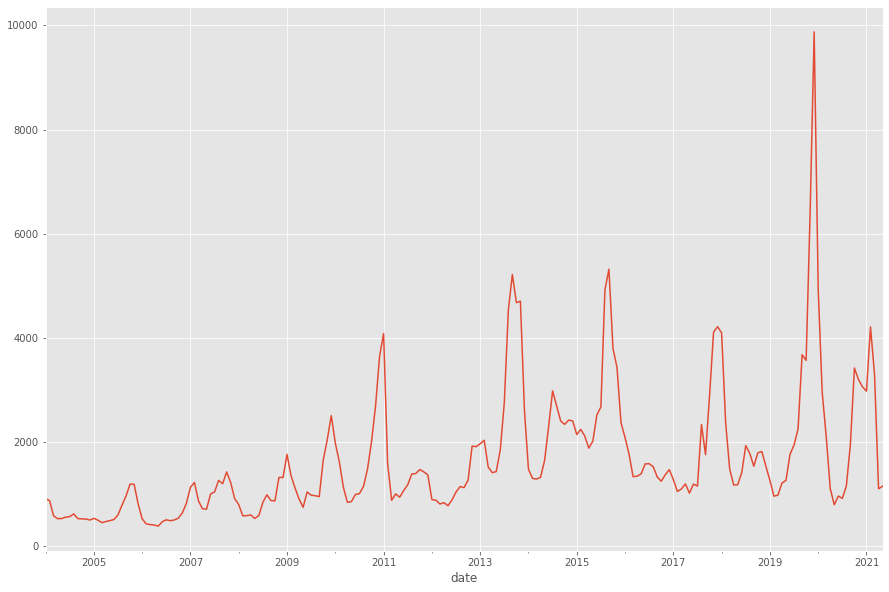

In [27]:
df.priceMod.plot()
plt.show()

### Date vs Min, Max, Mod price

<Figure size 1440x720 with 0 Axes>

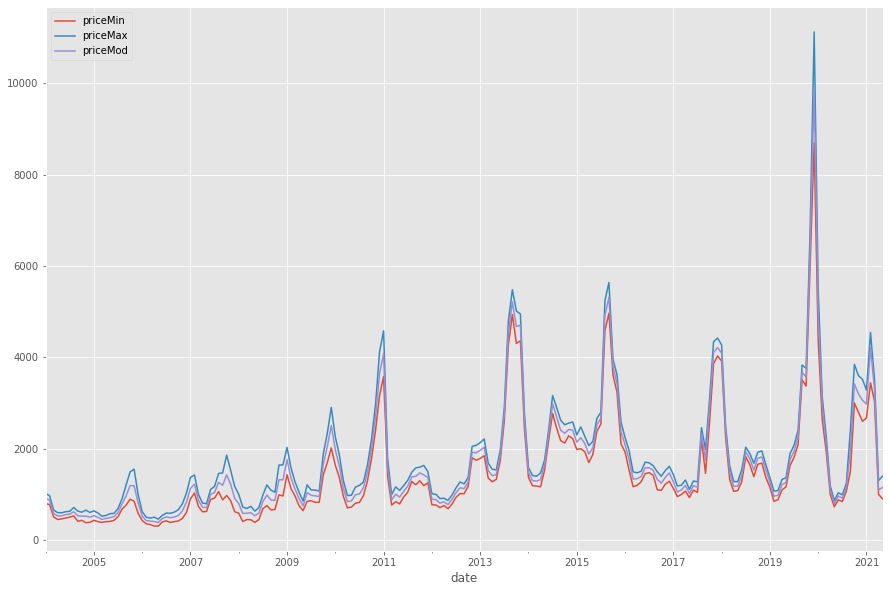

In [28]:
plt.figure(figsize=(20, 10))
df.plot(kind="line", y=["priceMin" ,"priceMax" ,"priceMod"])
plt.show()

### Price Difference vs Date

In [29]:
df["priceDiff"] = df["priceMax"] - df["priceMin"]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date,priceDiff
date,,,,,,,,,
2004-01,CHENNAI,January,2004,103400,798,1019,910,2004-01-01,221
2004-02,CHENNAI,February,2004,87800,776,969,873,2004-02-01,193
2004-03,CHENNAI,March,2004,102180,506,656,580,2004-03-01,150
2004-04,CHENNAI,April,2004,83300,448,599,527,2004-04-01,151
2004-05,CHENNAI,May,2004,84850,462,596,529,2004-05-01,134


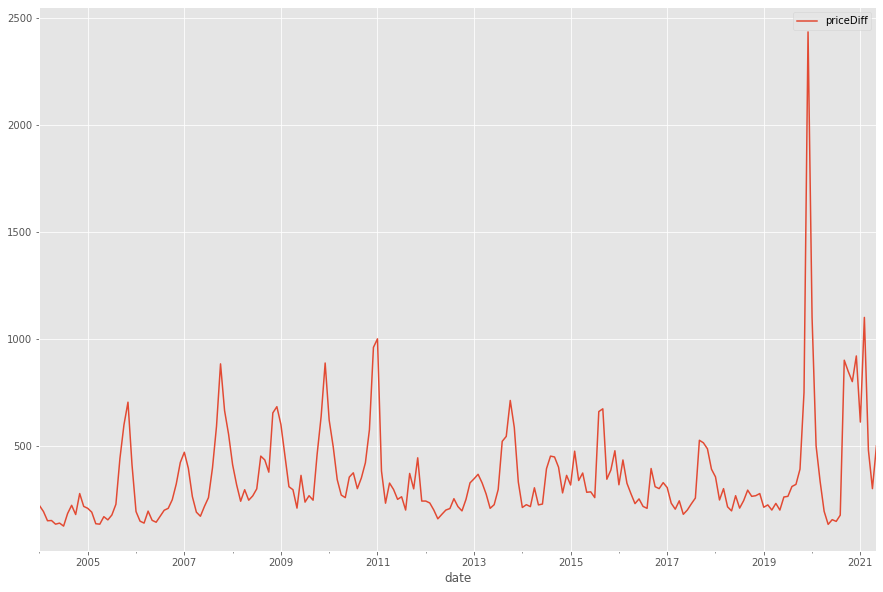

In [30]:
df.plot(y="priceDiff")
plt.show()

### Pivot table

In [31]:
df["monthVal"] = pd.DatetimeIndex(df["date"]).month
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,date,priceDiff,monthVal
date,,,,,,,,,,
2004-01,CHENNAI,January,2004,103400,798,1019,910,2004-01-01,221,1
2004-02,CHENNAI,February,2004,87800,776,969,873,2004-02-01,193,2
2004-03,CHENNAI,March,2004,102180,506,656,580,2004-03-01,150,3
2004-04,CHENNAI,April,2004,83300,448,599,527,2004-04-01,151,4
2004-05,CHENNAI,May,2004,84850,462,596,529,2004-05-01,134,5


In [32]:
df_Pivot = pd.pivot_table(df, values = "priceDiff", 
                             columns = "year", index = "monthVal")
df_Pivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
monthVal,,,,,,,,,,,,,,,,,,
1,221,208,193,470,412,600,620,1000,242,346,212,317,318,305,355,213,1100,611
2,193,190,148,395,318,456,496,382,233,367,225,475,434,232,247,224,500,1100
3,150,136,139,263,241,309,342,232,200,327,216,338,325,204,300,200,334,480
4,151,134,195,190,295,295,270,326,159,275,304,373,276,243,215,231,194,300
5,134,169,152,171,246,209,258,296,180,208,224,283,230,180,196,200,133,500
6,139,154,143,217,266,362,354,250,200,225,228,285,252,200,267,261,155,NaN
7,125,177,171,258,299,237,374,262,207,296,393,258,217,229,209,264,147,NaN
8,184,227,199,397,452,267,300,200,253,521,452,660,208,256,244,310,176,NaN
9,222,441,208,591,434,246,350,371,216,544,448,673,394,526,293,320,900,NaN


### Month vs Price Diff

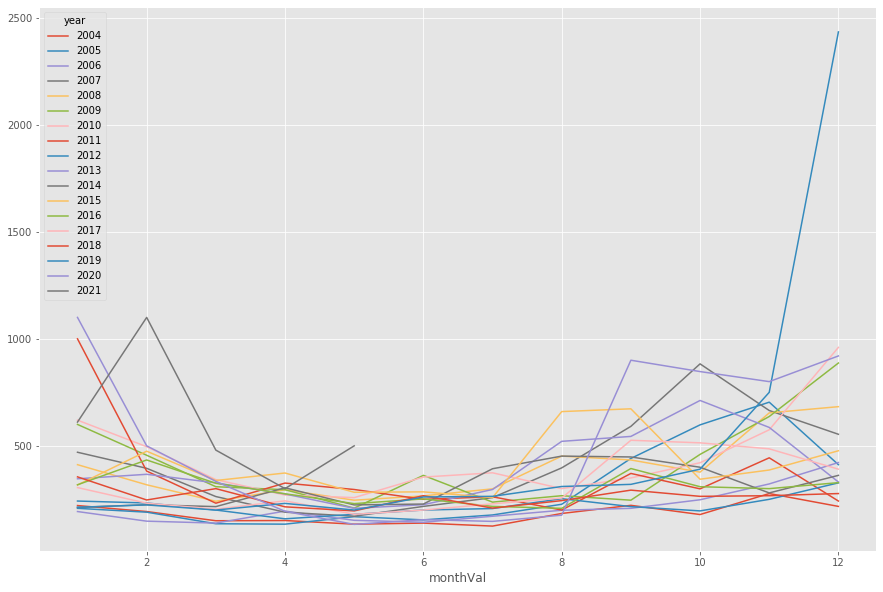

In [33]:
df_Pivot.plot()
plt.show()

### Price trend every year

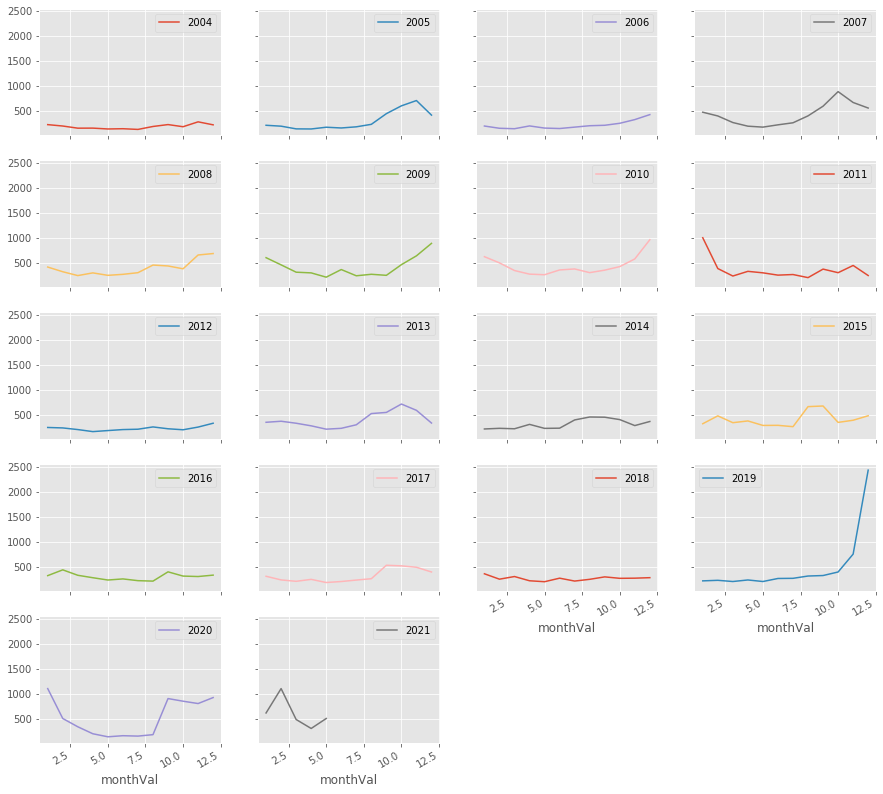

In [34]:
df_Pivot.plot(subplots = True, figsize=(15, 15), layout=(5, 4), sharey=True)
plt.show()